In [101]:
IMG_DIR = 'images/'

IMG_NAME = '-3056.jpg'

CONFIG_FILE_NAME = 'yolov3-spp.cfg'

WEIGHTS_FILE_NAME = 'yolov3-spp.weights'

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
import cv2

In [104]:
## loading yolo model
net = cv2.dnn.readNetFromDarknet(CONFIG_FILE_NAME,WEIGHTS_FILE_NAME)
net

< cv2.dnn.Net 0000022A28EFF690>

In [105]:
classes = []
with open('coco.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

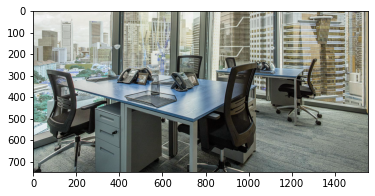

In [106]:
img = cv2.imread('{}{}'.format(IMG_DIR, IMG_NAME))
plt.imshow(img)

In [107]:
img.shape

(746, 1554, 3)

In [108]:
# scale_percent = 80 # percent of original size
# width = int(img.shape[1] * scale_percent / 100)
# height = int(img.shape[0] * scale_percent / 100)
# dim = (width, height)
  
# # resize image
# img = cv2.resize(img, (1280,720))


In [109]:
ht, wt, _ = img.shape

In [110]:
blob = cv2.dnn.blobFromImage(img, 1/255, (416,416), (0,0,0), swapRB=True, crop=False)

In [111]:
blob.shape

(1, 3, 416, 416)

In [112]:
net.setInput(blob)

In [113]:
last_layer = net.getUnconnectedOutLayersNames()
last_layer

('yolo_89', 'yolo_101', 'yolo_113')

In [114]:
layer_out = net.forward(last_layer)
layer_out

(array([[0.0429195 , 0.03870126, 0.4202759 , ..., 0.        , 0.        ,
         0.        ],
        [0.04323182, 0.03632976, 0.23877834, ..., 0.        , 0.        ,
         0.        ],
        [0.03942838, 0.03945924, 0.9937438 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96664536, 0.95627123, 0.36728448, ..., 0.        , 0.        ,
         0.        ],
        [0.94527215, 0.95364445, 0.33436835, ..., 0.        , 0.        ,
         0.        ],
        [0.97846293, 0.95744795, 0.71899915, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.0225745 , 0.02166919, 0.04589161, ..., 0.        , 0.        ,
         0.        ],
        [0.01054225, 0.02325601, 0.28922293, ..., 0.        , 0.        ,
         0.        ],
        [0.0190812 , 0.01636017, 0.07256626, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97587883, 0.97946906, 0.03772589, ..., 0.        , 0.        ,
         0.        

In [115]:
layer_out[0].shape

(507, 85)

In [116]:
boxes = []
confidences = []
class_ids = []

for ouput in layer_out:
    for detection in ouput:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .5:
            center_x = int(detection[0] * wt)
            center_y = int(detection[0] * ht)
            w = int(detection[2] * wt)
            h = int(detection[2] * ht)

            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)




In [117]:
confidences

[0.696421205997467, 0.8118641972541809, 0.6327027678489685]

In [118]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences, .5, .4 )
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [119]:
indexes

array([1, 0, 2])

In [120]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText (img,label+" "+confidence,(x,y+20),font,2,(0,0,0),2)
cv2.imshow('img', img )
cv2.waitKey ( 0 )
cv2.destroyAllWindows()